In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# size of our encoded representations
encoding_dim = 8
mid_dim = 128 #64

# input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(mid_dim, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(mid_dim, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dense_9 (Dense)             (None, 32)                288       
                                                                 
 dense_10 (Dense)            (None, 128)               4224      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

In [ ]:
adam = Adam(learning_rate=0.001)

autoencoder.compile(optimizer=adam, loss='binary_crossentropy')

In [ ]:
#prepare input data

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#autoencoder.load_weights("weights/autoenc.h5")

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#autoencoder.save_weights("weights/autoenc.h5")

Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1310 - val_loss: 0.1307
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1306 - val_loss: 0.1306
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1303 - val_loss: 0.1302
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1299 - val_loss: 0.1295
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1291 - val_loss: 0.1280
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1276 - val_loss: 0.1269
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1267 - val_loss: 0.1261
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1260 - val_loss: 0.1255
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1254 - val_loss: 0.1251
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1249 - val_loss: 0.1245

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


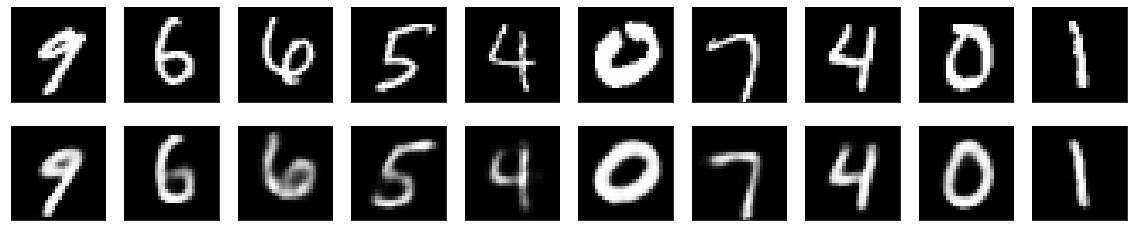

In [ ]:
# use Matplotlib for visualization
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+20].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i+20].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
mse = np.mean(np.square(decoded_imgs - x_test),axis=1)
print(mse.shape)
print(np.mean(mse))
print(np.std(mse))

(10000,)
0.019840078
0.011425587


In [ ]:
test = x_test[15]
dec_test = autoencoder.predict(test.reshape(1,784))
#print(np.shape(test)
test_mse = np.mean(np.square(dec_test - test))
print(test_mse)

1/1 [==============================] - 0s 17ms/step
0.026374904


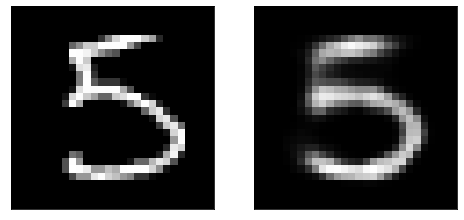

In [ ]:
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(test.reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(dec_test.reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('lyar2.jpg')
plt.show()

In [ ]:
rotated = np.rot90(test.reshape(28,28))
rot_test = rotated.reshape(1,784)
dec_rot = autoencoder.predict(rot_test)

1/1 [==============================] - 0s 17ms/step


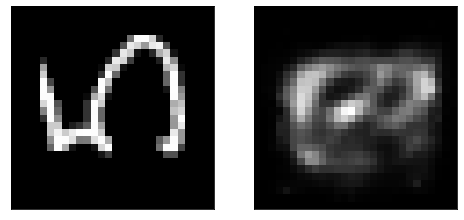

In [ ]:
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(rotated)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(dec_rot.reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('lyar2.jpg')
plt.show()

In [ ]:
rot_mse = np.mean(np.square(dec_rot - rot_test))
print(rot_mse)

0.0690376
